# Nguyen Vinh Nghi 

# CE182108

In [208]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from skimage.filters import gaussian
from skimage.segmentation import active_contour

In [209]:
def draw_img(image, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(image)
    plt.title(title)

    plt.show()

# Function 1

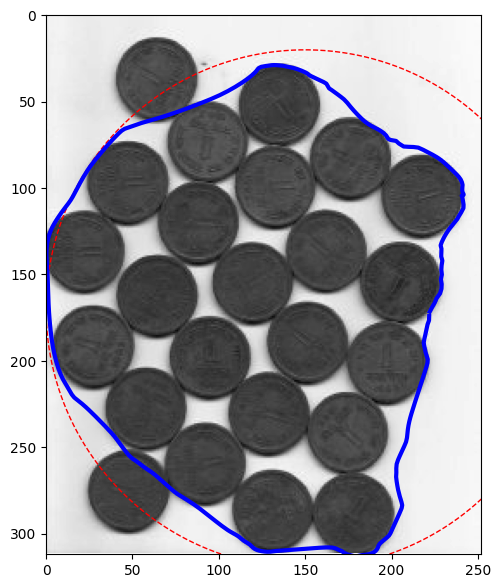

In [210]:
img = cv2.imread('./coins.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

s = np.linspace(0, 2*np.pi, 400)
r = 170 + 150*np.sin(s)
c = 150 + 150*np.cos(s)
init = np.array([r, c]).T

gaussian_img = gaussian(img_gray, sigma=1)

snake = active_contour(
    gaussian_img,
    init,
    alpha=0.015,
    beta=10,
    gamma=0.001
)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img_gray, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=1)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.axis([0, img_gray.shape[1], img_gray.shape[0], 0])
plt.show()

# Fuction 2

In [211]:
def initialize_clusters(data, k):
    n_sample, _ = data.shape
    indices = np.random.choice(k)
    return data[indices]

In [212]:
def update_clusters(data, assignments, k):
    new_clusters = np.zeros((k, data.shape[1]))
    for cluster_idx in range(k):
        cluster_data = data[assignments == cluster_idx]
        if len(cluster_data) > 0:
            new_clusters[cluster_idx] = np.mean(cluster_data, axis=0)
    return new_clusters

In [213]:
def kmeans(data, k, max_iters=100):
    # Initialize clusters
    clusters = initialize_clusters(data, k)
    # assignments = np.zeros(data.shape[0])
    
    for _ in range(max_iters):
        # Assign data points to the closest cluster centroid
        distances = np.linalg.norm(data[:, np.newaxis] - clusters, axis=2)
        assignments = np.argmin(distances, axis=1)

        # Update cluster centroids
        new_clusters = update_clusters(data, assignments, k)

        # Check for convergence
        if np.allclose(clusters, new_clusters):
            print("Converged.")
            break
        
        clusters = new_clusters

    return assignments, clusters


In [214]:
img = cv2.imread('./forColorSeg.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

w, h, d = original_shape = tuple(img_rgb.shape)
image_2d = np.reshape(img_rgb, (w*h, d))

n_clusters = 3
max_iters = 100

assignments, clusters = kmeans(image_2d, n_clusters, max_iters)
clustered_img = np.reshape(assignments, (w,h))


Converged.


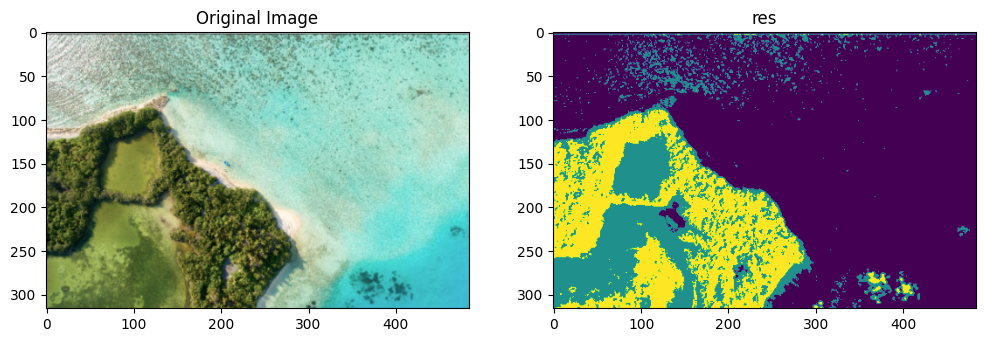

In [215]:
draw_img(clustered_img, "res")